<a href="https://colab.research.google.com/github/zahraDehghanian97/NCRP_HLDA/blob/master/NCRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Preleminary

The Chinese Restaurant Process (CRP) is a distribuition on partitions of integers. Imagine there are M customers in a Chinese restaurant with infinte tables. The first customer sit in the first table. The following customers have two kinds of choices:

+ Sit in the table that some one alse is already there 
+ Sit in a new table

These two choices have probabilities that depend on the previosu customers at the tables. 
<br>
Specifically, for the $m$th customer, the probability to sit in a table is:
+ p(occupied table i| previous customers) = $\frac{m_i}{\gamma+m-1}$
+ p(next unoccupied table| previous customers) = $\frac{\gamma}{\gamma+m-1}$,

where $m_i$ represnets the number of previous customers at the table $i$; $\gamma$ is a parameter.

If we have M customers, the CRP will give us a partion of M customers, which has the same structure as a Dirichlet process. 

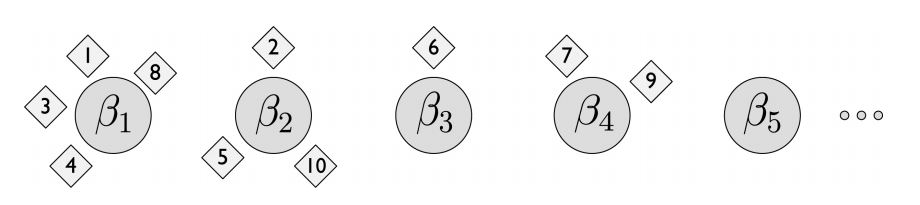

In [9]:
import numpy as np

def CRP(alpha,N):
    """
    Description
    ---------
    Funcion: Chinese Restaurant Process
    
    Parameter
    ---------
    alpha: concentration parameter 
    N: the number of customers
    
    Return
    ------
    tables: number of customers at each table
    p: the probability for customers to sit in each table
    """
    tables = np.zeros(N)  # table's number of customer 
    tables[0] = 1         # at first, every table is empty
    if N==1:
        tables=np.array(1)
        p=[1]
    if N>1:
        for i in range(2,N+1):
            p_old=tables/(alpha+i-1) # the probability of sitting in a table with other people   
            p_old=p_old[p_old>0] 
            p_new=alpha/(alpha+i-1)      # the probability of sitting in a new table
            n_temp=len(p_old)+1
            p=list(p_old)+[p_new]
            num=np.random.choice(n_temp,p=p) # generate the table number based on the probabilities
            tables[num]=tables[num]+1
        tables=tables[tables>0]
    return(tables,p)

In [10]:
CRP(1,100)

(array([72., 24.,  1.,  2.,  1.]), [0.71, 0.24, 0.01, 0.02, 0.01, 0.01])

## 2 Nested Chinese Restaurant Process

The CRP is amenable to mixture modeling because we can establish a one-to-one rela- tionship between tables and mixture components and a one-to-many relationship between mixture components and data. In the models that we will consider, however, each data point is associated with multiple mixture components which lie along a path in a hierarchy.
A nested Chinese restaurant process can be defined by imagining the following scenario. Suppose that there are an infinite number of infinite-table Chinese restaurants in a city. One restaurant is determined to be the root restaurant and on each of its infinite tables is a card with the name of another restaurant. On each of the tables in those restaurants are cards that refer to other restaurants, and this structure repeats infinitely. Each restaurant is referred to exactly once; thus, the restaurants in the city are organized into an infinitely-branched tree. Note that each restaurant is associated with a level in this tree (e.g., the root restaurant is at level 1 and the restaurants it refers to are at level 2).
A tourist arrives in the city for a culinary vacation. On the first evening, he enters the root Chinese restaurant and selects a table . On the second evening, he goes to the restaurant identified on the first nights table and chooses another table, again. He repeats this process for L days. At the end of the trip, the tourist has sat at L restaurants which constitute a path from the root to a restaurant at the Lth level in the infinite tree described above. After M tourists take L-day vacations, the collection of paths describe a particular L-level subtree of the infinite tree (see Figure 1a for an example of such a tree).
This prior can be used to model topic hierarchies. Just as a standard CRP can be used to express uncertainty about a possible number of components, the nested CRP can be used to express uncertainty about possible L-level trees.

In summary, The CRP establishes a one-to-one relationship between tables and mixture components. A hierarchical version of CRP was also developed to model one-to-many. The nCRP is very similar with CRP except for its hieracrchical structure. 

We can see an example in the following plot.


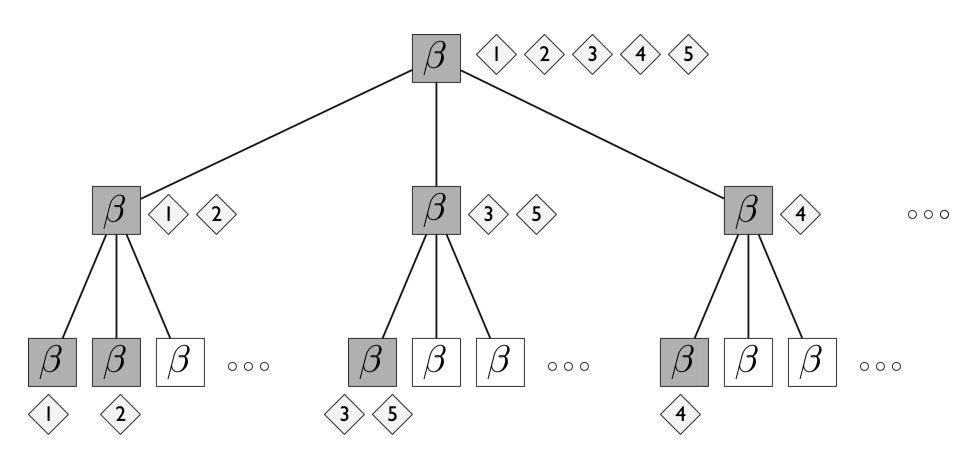

## 3. A hierarchical topic model


One of the realization and application of NCRP is the Hierarchical Latent Dirichlet Allocation (hLDA) model. The HLDA has a prior from NCRP. 

So, as follow we try to implement HLDA based on the description in the paper.

### 3.1 A topic model 


Generation of a document:
1. Choose a $K$-vector $\theta$ of topic proportions from a distribution $p(\theta|\alpha)$ 
2. Repeated sample words from the mixture distriubtion $p(\omega|\theta)$ for the chosen value of $\theta$

Besides, when the $p(\theta|\alpha)$ is chosen to be a Dirichlet distribution, these processes are identified as a latent Dirichlet allocation model (LDA)

### 3.2 A hierarchical topic model 

Back to the hierarchical topic model, which is very simliar with previous one but added a hierarchical structure. For a hierarchial topic model with L-levels, we can imagine it as a L-level tree and each node presents a topic.

Generation of a document:
1. Choose a path from the root to a leaf
2. Choose the topic proportions $\theta$ from a L-dimension Dirichlet
3. Generated the words in the document for m a mixture of the topics along the path from the root to leaf, wiht mixing proportions $\theta$

This generation of document is very simliar with previous one except the mixing proportion $\theta$ is from a hierarchical structure



+ $\omega$
+ $z$: a multinomial variable
+ $\beta$: a parameter
+ $\theta$: a $K-$dimensional vector

document specific mixture distribution: $p(\omega|\theta)=\sum_{i=1}^{K} \theta_i p(\omega| z=i, \beta+i)$

$p(\theta|\alpha)$ Dirichlet distribution

+ $\alpha$: a corpus-level parameter 


## 4. Gibbs sampling

here is a simple description of Gibbs sampling Algorithm :   

We start off by selecting an initial value for the random variables X & Y. Then, we sample from the conditional probability distribution of X given Y = Y⁰ denoted p(X|Y⁰). In the next step, we sample a new value of Y conditional on X¹, which we just computed. We repeat the procedure for an additional n - 1 iterations, alternating between drawing a new sample from the conditional probability distribution of X and the conditional probability distribution of Y, given the current value of the other random variable.

 Gibbs Sampling is applicable when the joint distribution is not known explicitly or is difficult to sample from directly, but the conditional distribution of each variable is known and is easier to sample from.

 The Gibbs Sampling is a Monte Carlo Markov Chain method that iteratively draws an instance from the distribution of each variable, conditional on the current values of the other variables in order to estimate complex joint distributions. In contrast to the Metropolis-Hastings algorithm, we always accept the proposal. Thus, Gibbs Sampling can be much more efficient.

* To be more specific:

### 4.1 Sample $z_{m,n}$

assign all words in a corpus into T topics.

The $z_{m,n}$ is sampled under LDA model based on the method in paper:

<p style="text-align: center;">
*A probabilistic approach to semantic representation*
</p>

The distribution of any word 

In [12]:
def Z(corpus, T, alpha, beta):
    """
    Description
    ---------
    Funcion:  sample zmn under LDA model
    
    Parameter
    ---------
    corpus: the total corpus, (list of lists)
    T: the number of topics
    alpha, beta: parameters
    
    Return
    ------
    topic: the word list in each topic
    topic_num: the length of each topic
    """
    
    W=np.sum([len(word) for word in corpus]) # the number of the total words
    N=len(corpus)                            # the number of documents 
    topic=[[] for t in range(T)]
    topic_num=np.zeros(T)    

    for i,di in enumerate(corpus):
        for wi in di:
            p=np.zeros(T)
            for j in range(T):
                nij_wi=topic[j].count(wi)   # number of wi tht assigned to topic j
                nij=len(topic[j])           # total number of words assigned to topic j 
                nij_di=np.sum(np.isin(topic[j],di)) # number of words from di in topic j
                ni_di=len(di)               # total number of words in di
                part1=(nij_wi+beta)/(nij+W*beta)
                part2=(nij_di+alpha)/(ni_di+T*alpha)
                p[j]=part1 * part2
            pp=p/np.sum(p)
            w_assign=np.random.multinomial(1, pp, size=1)
            i_topic=int(np.where(w_assign[0]==1)[0])
            topic[i_topic].append(wi)
            topic_num=topic_num+w_assign
    return(topic,topic_num)

In [202]:
corpus=[['a'], ['bbb', 'b'], ['cc', 'a'], ['d', 'bbb', 'b'], ['a','cc'], ['d', 'bbb', 'b'], ['b', 'bbb', 'b'],['a','c'],['c'] ]
T=2
alpha=0.1
beta=1

In [194]:
Topic=Z(corpus, T, alpha, beta)
Topic

([['bbb', 'b', 'bbb', 'b', 'd', 'bbb', 'b', 'b', 'bbb', 'b'],
  ['a', 'cc', 'a', 'd', 'a', 'cc', 'a', 'c', 'c']],
 array([[10.,  9.]]))

### 4.2 sample $c_m$ from the nCRP

probability of each document to be assigned in each topic


$$p(c_m | w, c_{-m}, z) \propto p(w_m | c, w_{-m}, z)  p(c_m | c_{-m})$$

The calculation of the $p(w_m | c, w_{-m},z)$ value based on the likelihood function: 

$$p(w_m | c, w_{-m},z) = \prod_{l=1}^{L} (\frac{\Gamma (n_{c_{m,l,-m}}^{(\cdot)}+W\eta)}{\prod_{\omega} \Gamma (n_{c_{m,l,-m}}^{(\omega)}+\eta)}\frac{\prod_{\omega} \Gamma(n_{c_{m,l,-m}}^{(\omega)}+n_{c_{m,l,m}}^{(\cdot)}+\eta)}{\Gamma(n_{c_{m,l,-m}}^{(\cdot)}+ n_{c_{m,l,m}}^{(\cdot)}  W\eta)})$$

where, 

In [85]:
def word_likelihood(corpus,topic,eta):
    """
    Description
    ---------
    Funcion:  calculation of p(w|c,w,z), based on the likelihood function
    
    Parameter
    ---------
    corpus: the total corpus, (list of lists)
    topic: the topics of the corpus
    eta: parameter 
    
    Return
    ------
    a matrix of probabilities: 
        the number of rows = the number of documents, 
        the number of columns = the number of topics,
        the cell: the probability of each document to be assigned in each topic
    """
    
    import math
    res=np.zeros((len(corpus),len(topic)))  # generate the results matrix
    
    word_list=[]                            # generate the word list that contains all the words
    for i in range(len(corpus)):
        word_list=word_list+corpus[i]
    W=len(word_list)                        # the length of word list
    
    for i,di in enumerate(corpus):
        p_w=1
        for j in range(len(topic)):         #calculate the tow parts of the equation
            nc_dot=len(topic[j])    
            part1_denominator=1
            part2_nominator=1
        
            part1_nominator = math.gamma(nc_dot-np.sum(np.isin(topic[j],di))+W*eta)
            part2_denominator = math.gamma(nc_dot+W*eta)
        
            for word in word_list:
                ncm_w=topic[j].count(word)-di.count(word)
                if ncm_w <0:
                    ncm_w=0
                nc_w=topic[j].count(word)
                part1_denominator=part1_denominator*(ncm_w+eta)
                part2_nominator=part2_nominator*(nc_w+eta)
        
            p_w=p_w*part1_nominator*part2_nominator/(part1_denominator*part2_denominator) 
            res[i,j]=p_w
    res=res/np.sum(res,axis=1).reshape(-1,1)
    return(res)

In [128]:
eta=1
topic=Topic[0]
word_likelihood(corpus,topic,eta)

array([[9.98915842e-01, 1.08415774e-03],
       [5.00000000e-01, 5.00000000e-01],
       [9.99977800e-01, 2.21995294e-05],
       [5.00000000e-01, 5.00000000e-01],
       [9.99977800e-01, 2.21995294e-05]])

### 4.3 sample the  $p(c_m|c_{-m})$

probability to choose a topic for a doc when removing all words of a doc from all topics

In [87]:
def one_step_CRP(alpha,topic):
    """
    Description
    ---------
    Funcion: Chinese Restaurant Process
    
    Parameter
    ---------
    alpha: concentration parameter 
    topic: the exist tables 
    
    Return
    ------
    p: the probability for a new customers to sit in each of the tables
    """
    N=len(topic) # number of tables
    word_list=[] # total customers
    for t in topic:
        word_list=word_list+t
    m=len(word_list) # customers' number
    
    tables = np.array([len(x) for x in topic])  # tables with their customers
    p_old=tables/(alpha+m) # the probability of sitting in a table with other people   
    p_new=alpha/(alpha+m)      # the probability of sitting in a new table
    p=list(p_old)+[p_new]  # the last probability is the probability to sit in a new table 
    return(p)

In [130]:
def CRP_prior(corpus,topic,alpha):
    res=np.zeros((len(corpus),len(topic)))
    for i,corpus_i in enumerate(corpus):
        topic_new=[]
        for t in topic:
            topic_new.append([k for k in t if k not in corpus_i])
        p=one_step_CRP(alpha,topic_new)
        res[i,:]=p[1:] #there is no new table
    return(res)

In [131]:
CRP_prior(corpus,topic,alpha)

array([[0.25      , 0.125     ],
       [0.71428571, 0.14285714],
       [0.        , 0.16666667],
       [0.83333333, 0.16666667],
       [0.        , 0.16666667]])

##5. combination  

In [187]:
def gibbs_position(corpus,T,alpha,beta,eta,iters=100):
    word_list=[]
    for i in corpus:
        word_list=word_list+i
    W=len(word_list)
    gibbs=np.zeros((W,iters))
    for j in range(iters):
        topic=Z(corpus, T, alpha, beta)[0]
        w_m=word_likelihood(corpus,topic,eta)
        c_=CRP_prior(corpus,topic,alpha)
        c_m = (w_m * c_) / (w_m * c_).sum(axis = 1)[:, np.newaxis]
        g=[]
        for i,corpus_i in enumerate(corpus):
            for word in corpus_i:
                g.append(int(np.where(np.random.multinomial(1, c_m[i])!=0)[0]))
        gibbs[:,j]=g
    
    word_topic=[]
    for i in range(W):
        counts=[]
        for t in range(T):
            counts.append(list(gibbs[i]).count(t))
        word_topic.append(np.where(counts==np.max(counts))[0][0])
    return(word_topic)

In [91]:
def gibbs_list(corpus,T,alpha,beta,eta,iters):
    word_list=[]
    for i in corpus:
        word_list=word_list+i
    position=gibbs_position(corpus,T,alpha,beta,eta,iters)
    n_topic=len(np.unique(position))
    word_list_topic=[[] for x in range(n_topic)]
    for n_t in range(n_topic):
        word_list_topic[n_t].append(list(np.array(word_list)[np.array(position)==np.array(n_t)]))
    return(position,word_list_topic)    

In [212]:
corpus=[['a'], ['bbb', 'b'], ['cc', 'a'], ['d', 'bbb', 'b']]
T=2
alpha=1
beta=1
iters=100
eta = 0.1
gibbs_list(corpus,T,alpha,beta,eta,iters)

([0, 0, 0, 1, 1, 1, 1, 1],
 [[['a', 'bbb', 'b']], [['cc', 'a', 'd', 'bbb', 'b']]])

### Final *hLDA* function

In [213]:
def node_sampling(corpus, alpha):
    topic = []    
    for corpus_i in corpus:
        for word in corpus_i:
            c_m = one_step_CRP(alpha,topic)
            theta = np.random.multinomial(1, (np.array(c_m)/sum(c_m))).argmax()

            if theta == len(c_m)-1:
                topic.append([word])
            else:
                topic[theta].append(word)
    return topic

In [230]:
phi=1
topic = node_sampling(corpus, phi)
topic

[['a', 'cc', 'd'], ['bbb', 'b', 'a', 'bbb', 'b']]

In [231]:
def hLDA(corpus, alpha, beta, eta, iters, level):
    topic = node_sampling(corpus, phi)

    hLDA_tree = [[] for _ in range(level)]
    tmp_tree = []
    node = [[] for _ in range(level+1)]
    node[0].append(1)
    
    for i in range(level):
        if i == 0:
            wn_topic = gibbs_list(corpus, len(topic), alpha, beta, eta, iters)[1]
            node_topic = [x for word in wn_topic for x in word]
            hLDA_tree[0].append(node_topic)
            tmp_tree.append(wn_topic[1:])
            tmp_tree = tmp_tree[0]
            node[1].append(len(wn_topic[1:]))
        else:
            for j in range(sum(node[i])):
                if tmp_tree == []:
                    break
                wn_topic = gibbs_list(corpus, len(topic), alpha, beta, eta, iters)[1]
                node_topic = [x for word in wn_topic for x in word]
                hLDA_tree[i].append(node_topic)
                tmp_tree.remove(tmp_tree[0])
                if wn_topic[1:] != []:
                    tmp_tree.extend(wn_topic[1:])
                node[i+1].append(len(wn_topic[1:]))
        
    return hLDA_tree, node[:level]

In [232]:
wn_topic=gibbs_list(corpus, len(topic), alpha, beta, eta, iters)[1]
wn_topic

[[['a', 'bbb']], [['b', 'cc', 'a', 'd', 'bbb', 'b']]]

In [106]:
alpha=0.5
beta=0.1
eta=0.1

In [237]:
trees=hLDA(corpus, alpha, beta, eta, 100, 2)
trees

([[[['a', 'bbb', 'b', 'cc'], ['a', 'd', 'bbb', 'b']]],
  [[['a', 'b', 'a'], ['bbb', 'cc', 'd', 'bbb', 'b']]]],
 [[1], [1]])

##6. Visualize the Output 

In [ ]:
import numpy as np
from scipy.special import gammaln
import random
from collections import Counter
import string
import graphviz
import pydot

most_common = lambda x: Counter(x).most_common(1)[0][0]

def to_tuple(lst):
    return tuple(to_tuple(i) if isinstance(i, list) else i for i in lst)

def HLDA_plot(hLDA_object, Len = 8, save = False):
    
    from IPython.display import Image, display
    def viewPydot(pdot):
        plt = Image(pdot.create_png())
        display(plt)

    words = hLDA_object[0]
    print(words)
    struc = hLDA_object[1]
    print(struc)
    graph = pydot.Dot(graph_type='graph')
    end_index = [np.insert(np.cumsum(i),0,0) for i in struc]
    
    for level in range(len(struc)-1):
        leaf_level = level + 1
        word = words[level]
        leaf_word = words[leaf_level]
        leaf_struc = struc[leaf_level]
        end_leaf_index = end_index[leaf_level]
        print(leaf_struc)
        print(len(word[0]))
        for len_root in range(len(word[0])):
            print("***",len_root)
            print(Counter(word[0][len_root]).most_common(Len))
            root_word = '\n'.join([x[0] for x in Counter(word[0][len_root]).most_common(Len)])
            
            if word[0][len_root]!= []:
              # root_word = '\n'.join(most_common(word[0][len_root]))
              # leaf_index = leaf_struc[len_root]  
              start = end_leaf_index[len_root]
              end = end_leaf_index[len_root]
              lf = leaf_word[start:end]  
              print("------",lf)
              print("/",root_word)
              for l in lf[0]:
                  leaf_w = '\n'.join([x[0] for x in Counter(list(l)).most_common(Len)])
                  edge = pydot.Edge(root_word, leaf_w)
                  graph.add_edge(edge)
    if save == True:
        graph.write_png('./graph.png')
    viewPydot(graph)

HLDA_plot(trees, Len = 8, save = True)

## 7.Effect of hyper parameters

 The most influential hyperparameters in this regard are
the Dirichlet parameter for the topics η and the stick-breaking parameters for the
topic proportions {m, π}. The Dirichlet parameter controls the sparsity of the topics; smaller values of η will lead to topics with most of their probability mass on
a small set of words. With a prior bias to sparser topics, the posterior will prefer
more topics to describe a collection and thus place higher probability on larger
trees. The stick-breaking parameters control how many words in the documents
are likely to come from topics of varying abstractions. If we set m to be large (for
example, m = 0.5) then the posterior will more likely assign more words from
each document to higher levels of abstraction. Setting π to be large (e.g., π = 100)
means that word allocations will not likely deviate from such a setting.

. The hyperparameter γ reflects the tendency of the customers in each restaurant to share
tables, η reflects the expected variance of the underlying topics (e.g, η  1 will
tend to choose topics with fewer high-probability words), and m and π reflect
our expectation about the allocation of words to levels within a document. Thehyperparameters can be fixed according to the constraints of the analysis and prior
expectation about the data, or inferred as described in Section 5.4.
Intuitively, the CRP parameter γ and topic prior η provide control over the size of
the inferred tree. For example, a model with large γ and small η will tend to find a
tree with more topics. The small η encourages fewer words to have high probability
in each topic; thus, the posterior requires more topics to explain the data. The large
γ increases the likelihood that documents will choose new paths when traversing
the nested CRP.
The GEM parameter m reflects the proportion of general words relative to specific
words, and the GEM parameter π reflects how strictly we expect the documents toadhere to these proportions. A larger value of π enforces the notions of generality
and specificity that lead to more interpretable trees